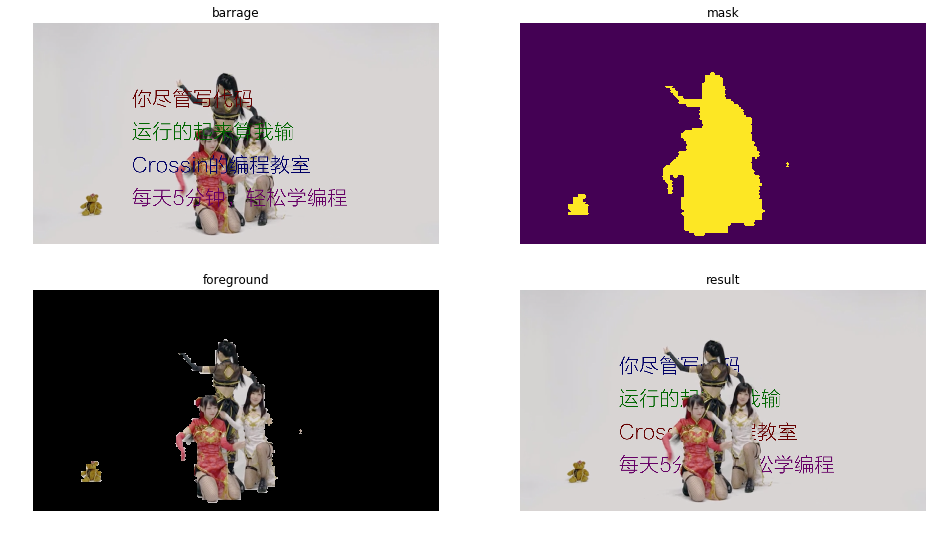

In [31]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image,ImageFont,ImageDraw

# 获取前景方法
def get_fore(img):
    shape = img.shape[:]
    # 缩小图片
    img = cv2.resize(img,(int(img.shape[1] / 8), int(img.shape[0] / 8)), interpolation=cv2.INTER_CUBIC)
    # 创建空的蒙版
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    # 判断范围限定
    rect = (10, 10, img.shape[1]-10, img.shape[0]-10)
    try:
        # 前景提取，结果保存在 mask 中
        cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    except:
        pass
    # 对蒙版进行着色、放大处理
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    mask = cv2.resize(mask,(shape[1], shape[0]))
    return mask

img = cv2.imread('jljt.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

font = ImageFont.truetype('../zhaozi.ttf', 60)
im = Image.fromarray(img)

draw = ImageDraw.Draw(im)
draw.text((300, 200), '你尽管写代码', '#600', font=font)
draw.text((300, 300), '运行的起来算我输', '#060', font=font)
draw.text((300, 400), 'Crossin的编程教室', '#006', font=font)
draw.text((300, 500), '每天5分钟，轻松学编程', '#606', font=font)

# 添加了弹幕的图像
plt.figure(figsize=(16,9))
plt.subplot(2, 2, 1)
plt.imshow(im)
plt.axis('off')
plt.title('barrage')

# 前景蒙版
mask = get_fore(img)
plt.subplot(2, 2, 2)
plt.imshow(mask)
plt.axis('off')
plt.title('mask')

# 前景
img_fore = img * mask[:,:,np.newaxis]
plt.subplot(2, 2, 3)
plt.imshow(img_fore)
plt.axis('off')
plt.title('foreground')

# 合成
img = im * (1-mask)[:,:,np.newaxis] + img * mask[:,:,np.newaxis]
plt.subplot(2, 2, 4)
plt.imshow(img)
plt.axis('off')
plt.title('result')

plt.show()


In [2]:
# 部分弹幕内容示例
barrages_all = [
    ('麻麻她撩我', 1),
    ('秀', 2),
    ('。。。', 3),
    ('1500万.....', 12),
    ('发', 5),
    ('每日三刷', 1),
    ('建议赶紧出去，要不然一会就晚了', 7),
    ('可怕', 9),
    ('666', 4),
    ('小孩子才做选择，我全都要', 4),
    ('弹幕被清了好多', 21),
    ('颜表立', 2),
    ('可耻的播放量', 17),
    ('哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈哈', 5),
    ('我没有', 12),
    ('38', 9),
    ('这毒，我！不！戒！', 15),
    ('还是小姨妈好看、', 27),
    ('我是来看腿的', 5),
    ('B站毒枭', 2),
    ('小孩才会选，我全都要！', 49),
    ('出不去了', 60),
    ('在现场 我是丝袜', 106),
    ('暂停成功', 218),
    ('开头见', 223),
    ('颜表立！', 17),
    ('颜表立！ 抱走猫酱', 92),
    ('突然害怕', 197),
    ('未来我的广场舞', 215),
    ('没弹幕', 18),
    ('白衣服的是我的，，', 155),
    ('这个我还是喜欢白衣服的，，', 117),
    ('白衣服是我的!', 177),
    ('我要表白白色，，，', 210),
    ('色表立', 40),
    ('C位终于浮现', 173),
    ('1600万助攻', 50),
    ('这么可爱怎么舍得拔头吃', 118),
    ('为了蕾丝', 29),
    ('1600万助攻', 14),
    ('颜表立', 51),
    ('喵酱我的！！！', 7),
    ('小孩子才全都要！我只要喵酱。', 80),
    ('极乐净土原作一出来就和大家一样很激动的喜欢上了，所以其实后面看到很多很多催稿极乐净土的评论，我都一直会想，啊，想默默练习给大家一个惊喜这件事恐怕是不行了～这支舞对于我非常有挑战，激发起了我全部的热情和', 93),
    ('颜表立', 32),
    ('欢迎回来，颜表立', 6),
    ('小孩子才做选择，我全都要', 14),
    ('全程看红色', 126),
    ('来考古的', 145),
    ('最高日第一emm', 18),
    ('哥仨不火天理难容', 19),
    ('都是我的！！！！', 115),
    ('遮弹幕的？', 123),
    ('黑衣服的我貌似在恋爱循环的某个视频看过', 26),
    ('我在后面', 137),
    ('真人版跳的最好的了', 162),
    ('啊啊', 85),
    ('hhhhhhhhhh', 29),
    ('我现在发现一个问题，这首歌我一天不听浑身难受', 97),
    ('弹幕呢？', 16),
    (' 颜色代表立场。', 17),
    ('猫酱', 30),
    ('喜欢红的', 45),
    ('漫长的3分钟', 155),
    ('白色', 41),
    ('我要接 住三个', 53),
    ('火钳刘明', 11),
    ('我就是看看人是不是真的可以挡住我的弹幕', 115),
    ('颜表立', 76),
    ('在现场，我是那个熊', 76),
    ('三个我都要！', 75),
    ('我怎么感觉脸这么长呢而且有点老啊', 151),
]
# 按时间排序
barrages_all.sort(key=lambda x:x[1])
# 可选颜色
colors = ['#600', '#060', '#006', '#066', '#606', '#660', '#666']

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image,ImageFont,ImageDraw
import time
import random

# 获取前景方法
def get_fore(img):
    shape = img.shape[:]
    # 缩小图片
    img = cv2.resize(frame,(int(img.shape[1] / 8), int(img.shape[0] / 8)), interpolation=cv2.INTER_CUBIC)
    # 创建空的蒙版
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    # 判断范围限定
    rect = (10, 10, img.shape[1]-10, img.shape[0]-10)
    try:
        # 前景提取，结果保存在 mask 中
        cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
    except:
        pass
    # 对蒙版进行着色、放大处理
    mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    mask = cv2.resize(mask,(shape[1], shape[0]))
    return mask

# 读取视频文件（需自行提供）
cap = cv2.VideoCapture('jljt.mp4')
cv2.namedWindow('AI Barrage', cv2.WINDOW_NORMAL)
t = 0
ticks = 0
mask_history = []
barrages = barrages_all[:]
barrages_active = []
# 创建字体（可在项目中获取，或自行提供）
font = ImageFont.truetype('../zhaozi.ttf', 18)

# 视频循环
while cv2.waitKey(1) < 0:
    # 获取帧图像
    hasFrame, frame = cap.read()
    if not hasFrame:
        cv2.waitKey()
        break
    # 提取前景
    mask = get_fore(frame)
    
    # 此处做了一个平滑处理
    # 如果当前蒙版像素数和之前20帧平均值相差过大
    # 则直接使用前一个有效蒙版
    mask_count = np.count_nonzero(mask)
    if len(mask_history) > 0:
        avg_mask = sum(mask_history) / len(mask_history)
        mask_ratio = mask_count / avg_mask
        if mask_ratio < 0.5 or mask_ratio > 1.5:
            mask = lask_mask
        else:
            lask_mask = mask
    else:
        lask_mask = mask
    mask_history.append(mask_count)
    if len(mask_history) > 20:
        mask_history.pop(0)
    
    # 加文字
    ticks += 1
    # 根据时间判断是否创建新的弹幕
    if len(barrages) > 0 and barrages[0][1] * 20 < ticks:
        b = {
            'text': barrages.pop(0)[0],
            'height': int(random.random() * frame.shape[0]),
            'width': frame.shape[1],
            'color': random.choice(colors)
        }
        barrages_active.append(b)
    # 依次将每一条有效弹幕绘制在图片上
    # 并移动弹幕
    im = Image.fromarray(frame)
    draw = ImageDraw.Draw(im)
    for b in barrages_active:
        draw.text((b['width'], b['height']), b['text'], b['color'], font=font)
        b['width'] -= 5
    # 去除屏幕外弹幕
    if len(barrages_active) > 0 and barrages_active[0]['width'] < -400:
        barrages_active.pop(0)
    frame_with_text = np.array(im)

    # 通过蒙版，将含弹幕的背景与原图前景叠加
    img = frame_with_text * (1-mask)[:,:,np.newaxis] + frame * mask[:,:,np.newaxis]
    # 显示图片
    cv2.imshow('AI Barrage', img)

    # 判断帧时长，通过sleep稳定帧率
    t2 = cv2.getTickCount()
    elapsed = ((t2 - t) / cv2.getTickFrequency())
    rest = max(0.075 - elapsed, 0)
#     print(rest)
    time.sleep(rest)
    t = cv2.getTickCount()
